# Set up and process metadata

In [2]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv
import pandas as pd

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float

def read_sylph(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df['Sample_file'] = df['Sample_file'].apply(lambda x: x.split('/')[-1].split('_1')[0])
    #df.set_index('Sample_file', inplace=True)
    return df


In [3]:
#df_hum_all = read_sylph('real_profiles/human_sylph_results-big.tsv')
#df_hum_refseq = read_sylph('real_profiles/human_sylph_results-refseq.tsv')

#df_env_all = read_sylph('real_profiles/env_sylph_results-big.tsv')
#df_env_refseq = read_sylph('real_profiles/env_sylph_results-refseq.tsv')

df_wallen_all  = read_sylph('real_profiles/wallen_profile.tsv')
df_wallen_refseq = read_sylph('real_profiles/wallen_profile_refseq.tsv')

df_mouse_all  = read_sylph('real_profiles/mouse_profile.tsv')
df_mouse_refseq = read_sylph('real_profiles/mouse_profile_refseq.tsv')

#df_wallen_all  = read_sylph('real_profiles/wallen_profile.tsv')
#df_wallen_refseq = read_sylph('real_profiles/wallen_profile_refseq.tsv')


df_wallen_all['Label'] = 'Gut'
df_wallen_refseq['Label'] = 'Gut'

df_mouse_all['Label'] = 'Mouse gut'
df_mouse_refseq['Label'] = 'Mouse gut'
#print(df_hum_all)

df_all = pd.concat([ df_wallen_all, df_mouse_all])
df_refseq = pd.concat([df_wallen_refseq, df_mouse_refseq])


FileNotFoundError: [Errno 2] No such file or directory: 'real_profiles/wallen_profile.tsv'

NameError: name 'df_all' is not defined

<Figure size 640x480 with 0 Axes>

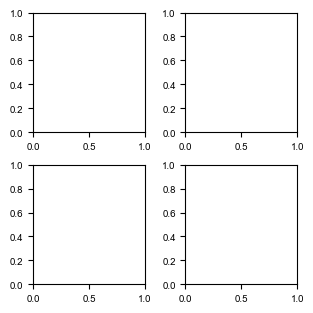

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches\n",
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.family':'arial'})
plt.subplots_adjust(hspace=0.4)
palette = sns.color_palette("husl")
titles = ['Gut', 'Mouse gut']
fig, axes = plt.subplots(2, len(titles), figsize=(8* cm, 8 * cm), sharey=False)


for j in range(2):
    if j == 0:
        p = [palette[0],palette[2]]
        df = df_all[df_all['Genome_file'].str.contains('gtdb')]
        df_r = pd.concat([
            df_refseq[df_refseq['Genome_file'].str.contains('bacteria')],
            df_refseq[df_refseq['Genome_file'].str.contains('archaea')]])

    else:
        p = [palette[1],palette[3]]
        df = df_all[df_all['Genome_file'].str.contains('imgvr')]
        df_r = df_refseq[df_refseq['Genome_file'].str.contains('viral')]        
    # Create a dictionary to store arrays of sizes for each label
    boxplot_data = {}
    boxplot_data_r = {}

    grouped = df.groupby(['Label', 'Sample_file'])['Sequence_abundance'].sum().reset_index(name='Counts')
    grouped_r = df_r.groupby(['Label', 'Sample_file'])['Sequence_abundance'].sum().reset_index(name='Counts')


    
    for label, group in grouped.groupby('Label'):
        boxplot_data[label] = group['Counts'].tolist()
        print(group['Counts'].mean())
    for label, group in grouped_r.groupby('Label'):
        boxplot_data_r[label] = group['Counts'].tolist()
        print(group['Counts'].mean())


    for label, data in boxplot_data_r.items():
        for k in range(len(data),len(boxplot_data[label])):
            data.append(0)
    
    for label in boxplot_data.keys():
        if label not in boxplot_data_r:
            boxplot_data_r[label] = np.zeros(len(boxplot_data[label]))
    


    #print(boxplot_data,j)
    #print(boxplot_data_r,j)
    for (i, label) in enumerate(titles):
        ax = axes[j, i]
        #print(label)
        #print(boxplot_data[label])
        if j == 0:
            data = {"GTDB-R214" : boxplot_data[label], "RefSeq\nprok." : boxplot_data_r[label]}
                # Convert dictionary to DataFrame
        else:
            data = {"IMG/VR4" : boxplot_data[label], "RefSeq\nviral" : boxplot_data_r[label]}
                # Convert dictionary to DataFrame
        df = pd.DataFrame.from_dict(data, orient='index').transpose()
        if j == 0:
            y = "Prok. reads detected (%)"
        else:
            y = "Viral reads detected (%)"
        df_melted = df.melt(var_name='Category', value_name=y)
        # Create the boxplot with smaller width
        sns.boxplot(x = 'Category', y = y, data=df_melted, ax=ax, palette=p, width=0.8)
        #ax.set_xticklabels(methods)
        #ax.set_ylabel(metric.capitalize())
        if j == 0:
            t = label + f" (n = {len(boxplot_data[label])})"
            ax.set_title(t, fontsize=7.0)    
        sns.despine(ax=ax)
        ax.set_xlabel('')

        #ax.tick_params(axis='x', rotation=75)
        
    # Add one title per row in the middle
    #fig.text(0.5, y_positions[i], setup, ha="center", va="center", fontsize=9)

# Show the grid of plots
plt.tight_layout()
plt.savefig('figures/real_profiling_gtdbvsrefseq.svg')
plt.show()

Label
GTDB-R214               27.409081
GTDB-R214 +\nSMAG DB    36.133865
Refseq\nprok.           25.468022
Name: Prok. reads detected (%), dtype: float64
Label
GTDB-R214                   17.413067
GTDB-R214 +\nOceanDNA DB    22.808353
Refseq\nprok.                1.647683
Name: Prok. reads detected (%), dtype: float64


/tmp/ipykernel_26334/1089378438.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=grouped,x="Label",y="Prok. reads detected (%)",
/tmp/ipykernel_26334/1089378438.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=grouped,x="Label",y="Prok. reads detected (%)",


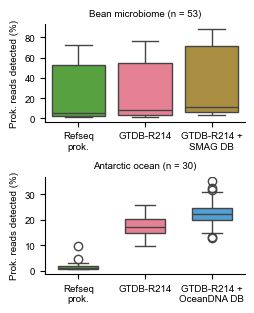

In [5]:
df_soil_gtdb  = read_sylph('real_profiles/PRJNA904562_gtdb.tsv')
df_soil_all= read_sylph('real_profiles/PRJNA904562_all.tsv')
df_soil_refseq = read_sylph('real_profiles/PRJNA904562_refseq.tsv')

df_soil_gtdb['Label'] = "GTDB-R214"
df_soil_all['Label'] = "GTDB-R214 +\nSMAG DB"
df_soil_refseq['Label'] = "Refseq\nprok."
df_soil = pd.concat([df_soil_refseq,df_soil_gtdb,df_soil_all])

df_ocean_gtdb  = read_sylph('real_profiles/PRJEB61010_gtdb.tsv')
df_ocean_all= read_sylph('real_profiles/PRJEB61010_all.tsv')
df_ocean_refseq = read_sylph('real_profiles/PRJEB61010_refseq.tsv')

df_ocean_gtdb['Label'] = "GTDB-R214"
df_ocean_all['Label'] = "GTDB-R214 +\nOceanDNA DB"
df_ocean_refseq['Label'] = "Refseq\nprok."
df_ocean = pd.concat([df_ocean_refseq,df_ocean_gtdb,df_ocean_all])

grouped = df_soil.groupby(['Label', 'Sample_file'])['Sequence_abundance'].sum().reset_index(name='Prok. reads detected (%)')

print(grouped.groupby(['Label'])['Prok. reads detected (%)'].mean())

fig,axes = plt.subplots(2,1, figsize=(6.5*cm,8*cm))
p = [palette[2], palette[0], palette[1]]
ax = sns.boxplot(data=grouped,x="Label",y="Prok. reads detected (%)", 
                 order = ["Refseq\nprok.","GTDB-R214","GTDB-R214 +\nSMAG DB"],width=0.8,palette=p, ax=axes[0] )
ax.set_title("Bean microbiome (n = 53)", fontsize = 7)
ax.set_xlabel("")
sns.despine(ax=ax)

grouped = df_ocean.groupby(['Label', 'Sample_file'])['Sequence_abundance'].sum().reset_index(name='Prok. reads detected (%)')
print(grouped.groupby(['Label'])['Prok. reads detected (%)'].mean())

p = [palette[2], palette[0], palette[4]]
ax = sns.boxplot(data=grouped,x="Label",y="Prok. reads detected (%)", 
                 order = ["Refseq\nprok.","GTDB-R214","GTDB-R214 +\nOceanDNA DB"],width=0.6,palette=p, ax= axes[1] )
ax.set_title("Antarctic ocean (n = 30)", fontsize = 7)
ax.set_xlabel("")

sns.despine(ax=ax)
plt.savefig("supp_figs/real_soil+ocean.svg")

In [6]:
import csv
import numpy as np
from dataclasses import dataclass
from sys import argv

@dataclass
class tax_result:
    species: str
    genus: str
    abund: float
    seq_abund: float

def truth(file_path, spec90 = False):
    taxonomic_data = dict()
    results = []
    with open(file_path, 'r') as f:
        csv_reader = csv.reader(f, delimiter='\t')
        for row in csv_reader:
            spl = row
            spec = spl[0]
            seq_abund = float(spl[1])
            data = tax_result(spl[0], "", 0, seq_abund)
            if spec90:
                if len(results) >= 50:
                    break
            results.append(data)
            
    total_seq = 0
    for r in results:
        total_seq += r.seq_abund
    for r in results:
        #r.seq_abund = r.seq_abund / total_seq
        if r.species in taxonomic_data:
            #print(r.species)
            taxonomic_data[r.species].seq_abund += r.seq_abund 
        else:
            taxonomic_data[r.species] = r

    return taxonomic_data

def read_sylph(file_path):
    sample_to_taxonomic_data = dict()
    with open(file_path, 'r') as f:
        csv_reader = csv.DictReader(f, delimiter='\t')
        for row in csv_reader:
            spl = row
            query = row['Sample_file'].split('/')[-1].split('_')
            diff = int(query[0][-2:])
            it = int(query[1])
            if (diff,it) in sample_to_taxonomic_data:
                taxonomic_data = sample_to_taxonomic_data[(diff,it)]
            else:
                taxonomic_data = {}
                sample_to_taxonomic_data[(diff,it)] = taxonomic_data
            ref = row['Contig_name'].rstrip()
            r = tax_result(ref,"", float(row['Taxonomic_abundance'])/100, float(row['Sequence_abundance'])/100)
            taxonomic_data[ref] = r
    return sample_to_taxonomic_data

def compare_to_truth(res, truth, debug = False):
    tp = 0
    fp = 0
    num_true = len(truth)
    num_pred = len(res)
    seq_abund_vec_res = []
    seq_abund_vec_truth = []
    
    for spec, data in truth.items():
        seq_abund_vec_truth.append(data.seq_abund)
        if spec in res:
            if debug:
                print('FOUND', truth[spec], res[spec])
            seq_abund_vec_res.append(res[spec].seq_abund)
            tp += 1
        else:
            if debug:
                print('NONE', spec, data)
            seq_abund_vec_res.append(0)
            #fp += 1
    for spec, data in res.items():
        if spec not in truth:
            if debug:
                print('NOT IN TRUTH', data)
            fp += 1
            seq_abund_vec_res.append(res[spec].seq_abund)
            seq_abund_vec_truth.append(0)

    #seq_abund_vec_truth = seq_abund_vec_truth / np.linalg.norm(seq_abund_vec_truth,1)
    #seq_abund_vec_res = seq_abund_vec_res / np.linalg.norm(seq_abund_vec_res,1)
    #genus_seq_abund_vec_truth = genus_seq_abund_vec_truth / np.linalg.norm(genus_seq_abund_vec_truth, 1)
    #genus_seq_abund_vec_res = genus_seq_abund_vec_res / np.linalg.norm(genus_seq_abund_vec_res,1)


    norm_seq_truth = seq_abund_vec_truth / np.linalg.norm(seq_abund_vec_truth,1)
    norm_seq_res = seq_abund_vec_res / np.linalg.norm(seq_abund_vec_res,1)
    
    l1_seqabund = np.sum(np.abs(np.array(seq_abund_vec_res) - np.array(seq_abund_vec_truth)))

    l1_seqabund_species = (np.sum(np.abs(np.array(norm_seq_truth) - np.array(norm_seq_res))))

    sensitivity = tp/num_true
    precision = 1 - fp/num_pred

    print('---------------')
    print("l1 seq,  sens, prec, number_of_predicted, num correct")
    f1 = 2 / (1 / sensitivity + 1 / precision)
    print(l1_seqabund,  sensitivity, precision, num_pred, tp)
    return({"F1":f1, "l1":l1_seqabund, "Sensitivity": sensitivity, "Precision": precision,
            "num_pred": num_pred, "tp": tp,  "l1_constrain": l1_seqabund_species})


In [7]:
sylph_results = read_sylph('./virus/vir_results.tsv')
sylph_stats = []

exps = [95]
its = range(0,11)

#exps = [98]
#its = [5,7]
for (i,diff) in enumerate(exps):
    for it in its:
        files = [f'./virus/species{diff}_{it}.tsv',
               'sylph',
              ]
        if diff == 90:
            truth_data = truth(files[0], spec90 = True)
            truth_data_all = truth(files[0], spec90=False)
        else:
            truth_data = truth(files[0])
        # Test the functions
        results = files[1:]
        
        out = ""
        print(it,diff)
        for result in results:
            if 'ganon' in result:
                results = read_ganon_file(result, species_name_to_spec, spec_to_metadata)
            elif 'sylph' in result:
                results = sylph_results[(diff,it)]
                
            debug = False

            stats = compare_to_truth(results, truth_data, debug)
            sylph_stats.append(stats)


0 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.2271387707891051 0.6756756756756757 0.9259259259259259 27 25
1 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.4495358402017753 0.7352941176470589 1.0 25 25
2 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.25987652442189235 0.6666666666666666 0.9565217391304348 23 22
3 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.3419667101593056 0.7894736842105263 1.0 30 30
4 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.40321349399189693 0.6896551724137931 1.0 20 20
5 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.161408391556575 0.6666666666666666 1.0 22 22
6 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.1888709972886751 0.78125 1.0 25 25
7 95
---------------
l1 seq,  sens, prec, number_of_predicted, num correct
0.29911744610416985 0.7647058823529411 0.928

/tmp/ipykernel_26334/2124969672.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)
/tmp/ipykernel_26334/2124969672.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Metric", y="Value",  data=df[df['Test Setup'] == test_setups[i]], palette='Set2', ci=None)
/tmp/ipykernel_26334/2124969672.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value",  data=df[df['Test Setup'] == test_se

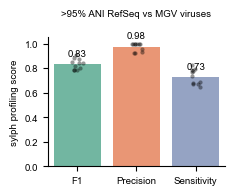

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cm = 1/2.54  # centimeters in inches\n",

# Your configuration remains the same
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
#plt.rcParams.update({'font.family':'arial'})

# Define the test setups and metrics
test_setups = [""]
metrics = ['F1', 'Precision', 'Sensitivity']
methods = ['sylph profile']

# Create an empty DataFrame
df = pd.DataFrame(columns=['Test Setup', 'Method', 'Metric', 'Value'])

# Populate the DataFrame
for i, setup in enumerate(test_setups):
    for method, method_stats in zip(methods, [sylph_stats]):
        for sample in method_stats:
            for metric in metrics:
                value = sample[metric]
                df = pd.concat([df,pd.DataFrame([{'Test Setup': setup, 'Method': method, 'Metric': metric, 'Value': value}])], ignore_index=True)

# Plotting
fig, ax = plt.subplots( figsize=(6* cm,5* cm))
sns.barplot(x="Metric", y="Value",  data=df[df['Test Setup'] == test_setups[i]], palette='Set2', ci=None)
sns.stripplot(x="Metric", y="Value", color="black", data=df[df['Test Setup'] == test_setups[i]], size=3, alpha=0.4)
        
ax.set_ylabel(' ')
sns.despine(ax=ax)
ax.set_ylim([0,1.05])
ax.set_xlabel("")
#plt.legend(frameon=False)

for p in ax.patches:
    if p.get_height() < 10:
        test = round(p.get_height(),2)
    else:
        test = round(p.get_height())
    ax.annotate(f'{test}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
            ha='center', va='bottom')
    
ax.set_title(">95% ANI RefSeq vs MGV viruses",y=1.1,fontsize=7)
ax.set_ylabel("sylph profiling score")
plt.savefig('figures/virus_results.svg')
plt.show()

In [ ]:
# Initialize empty lists to store data
time_data = []
cpu_time_data = []
memory_data = []

files = ['./times/sketch_gtdb.times', './times/sketch_imgvr.times', './times/sketch_refseq_bacteria+archaea.times', './times/sketch_refseq_viruse.times']
method_names = ['GTDB-R214', 'IMG/VR4*', 'RefSeq prok', 'RefSeq viral']

import re
plt.rcParams.update({'font.size': 7})

def parse_performance_stats(file, method):
    text = open(file,'r').readlines()[0]
    # Regular expressions for matching relevant data
    wall_time_pattern = r"(\d+):(\d+\.\d+)elapsed"
    user_time_pattern = r"(\d+\.\d+)user"
    system_time_pattern = r"(\d+\.\d+)system"
    max_resident_pattern = r"(\d+)maxresident\)k"

    # Extract wall time
    wall_time_match = re.search(wall_time_pattern, text)
    if wall_time_match:
        minutes, seconds = map(float, wall_time_match.groups())
        wall_time = minutes * 60 + seconds
    else:
        wall_time = None

    # Extract user and system time
    user_time_match = re.search(user_time_pattern, text)
    system_time_match = re.search(system_time_pattern, text)
    if user_time_match and system_time_match:
        user_time = float(user_time_match.group(1))
        system_time = float(system_time_match.group(1))
        cpu_time = user_time + system_time
    else:
        cpu_time = None

    # Extract maximum resident memory
    max_resident_match = re.search(max_resident_pattern, text)
    if max_resident_match:
        max_resident_kb = float(max_resident_match.group(1))
        max_resident_gb = max_resident_kb / (1024 * 1024)
    else:
        max_resident_gb = None

    time_data.append({'method': method, 'time': wall_time})
    cpu_time_data.append({'method': method, 'cpu_time': cpu_time})
    memory_data.append({'method': method, 'memory': max_resident_gb})

for i,file in enumerate(files):
    parse_performance_stats(file, method_names[i])
    
# Convert lists of dictionaries to DataFrames
time_df = pd.DataFrame(time_data)
cpu_time_df = pd.DataFrame(cpu_time_data)
memory_df = pd.DataFrame(memory_data)

print(time_df, cpu_time_df, memory_df)

fig, axes = plt.subplots(1, 2, figsize=(6* cm, 5 * cm))
palette = sns.color_palette("husl")
#ordered_labels = ['sylph profile',  'KMCP', 'ganon','Bracken', 'MetaPhlAn4']#, 'motus']
# Plot the wall time, CPU time and memory
ax1 = sns.barplot(y='time', x='method', data=time_df, estimator=lambda x: sum(x)/len(x), ax=axes[0], palette=palette )
#ax2 = sns.barplot(y='cpu_time', x='method',  data=cpu_time_df, estimator=lambda x: sum(x)/len(x), ax=axes[0], palette=palette )
ax3 = sns.barplot(x='method', y='memory', data=memory_df, estimator=max, ax=axes[1], palette=palette)

ax1.set(xlabel='', ylabel= 'Sketch wall time (s)')
#ax2.set(xlabel='', ylabel='sylph sketch CPU time (s)')
ax3.set(xlabel='', ylabel='Sketch memory (GB)')

# Add titles and remove top and right borders
titles = ['Mean wall Time (s)', 'Mean CPU Time (s)', 'Indexing memory (GB)']
for ax, title in zip(axes, titles):
    #ax.set_title(title)
    sns.despine(ax=ax)

# Annotate bars with integers
for (k,ax) in enumerate(axes):
    for p in ax.patches:
        if p.get_height() < 10:
            test = round(p.get_height(),1)
        else:
            test = round(p.get_height())
        ax.annotate(f'{test}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.05 ),
                ha='center', va='bottom')

    ax.tick_params(axis='x', rotation=75)

#plt.suptitle('Performance Metrics Across All Methods, Samples, and Experiments')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/real_database_sketching_time.svg')
plt.show()



In [ ]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

cm = 1/2.54

coverm = sys.argv[2]
sylph = sys.argv[1]

coverm = 'biofilm_bench/coverm_bam.tsv'
sylph = 'biofilm_bench/sylph_biofilm.tsv'

genome_to_cov  = defaultdict(list)
df1 = pd.read_csv(coverm, sep='\t')
df2 = pd.read_csv(sylph, sep='\t')

# Define function to process Genome_file to Genome
def process_genome_file(genome_file):
    return genome_file.split('/')[-1].split('.fa')[0]
def process_sample(x):
    return x.split('/')[-1].split('_')[0]

# Process the Genome_file in df2 to make it comparable with df1
df2['Genome'] = df2['Genome_file'].apply(process_genome_file)
df2['Sample_file'] = df2['Sample_file'].apply(process_sample)

# Merge DataFrames
merged_df = pd.merge(df1, df2, on='Genome')
#print(merged_df)

cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
fig, axes = plt.subplots(1,3,figsize=(15 * cm, 5* cm),gridspec_kw={'width_ratios': [1.5,1,1]})
all_means = []
all_covs = []
# Iterate over each Sample_file
sample_files = merged_df['Sample_file'].unique()
for sample in sample_files:
    # Filter merged_df for each Sample_file
    sample_df = merged_df[merged_df['Sample_file'] == sample]
    #print(sample_df)

    # Extract corresponding columns
    eff_cov_column = 'True_cov'  # Assuming Eff_cov corresponds to 'Taxonomic_abundance'
    sample_mean_column = f"{sample} Mean"

    eff_cov = sample_df[eff_cov_column]
    sample_mean = sample_df[sample_mean_column]
    for x in sample_mean:
        all_means.append(x)
    for x in eff_cov:
        all_covs.append(x)

    # Scatter plot
    axes[1].scatter(sample_mean, eff_cov, label=f'Sample: {sample}', s=7, c = 'black')
    axes[2].scatter(sample_mean, eff_cov, label=f'Sample: {sample}', s=7, c = 'black')
    
from scipy import stats
plt.xlabel('BWA coverage')
plt.ylabel('Sylph coverage')
#plt.suptitle("Biofloc metagenomes (n = 8)",fontsize=7)
#plt.title(f'Scatter Plot for Sample: {sample}')
axes[1].plot([0,700],[0,700])
axes[2].plot([0,30],[0,30])
axes[2].set_ylim([0,25])
axes[2].set_xlim([0,25])
for ax in axes:
    sns.despine(ax=ax)
    ax.set_xlabel('Alignment coverage (BWA)')
    ax.set_ylabel('% reads detected')

# Create linear regression object
regr = linear_model.LinearRegression()
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
# Train the model using the training sets
regr.fit(np.array(all_means).reshape(-1,1), np.array(all_covs).reshape(-1,1))
print(regr.coef_, regr.intercept_)
r2 = pearsonr(all_means, all_covs).statistic
df_bio_gtdb  = read_sylph('real_profiles/biofilm_gtdb_only.tsv')
df_bio_all= read_sylph('real_profiles/biofilm_with_mags.tsv')
df_bio_refseq = read_sylph('real_profiles/biofilm_refseq.tsv')
s = ["sylph\nGTDB+\nIMGVR","sylph\nGTDB+\nIMGVR+\nSample MAGs","sylph\nRefSeq"]
df_bio_gtdb['Label'] = s[0]
df_bio_all['Label'] = s[1]
df_bio_refseq['Label'] = s[2]
df_bio = pd.concat([df_bio_refseq,df_bio_gtdb,df_bio_all])

grouped = df_bio.groupby(['Label', 'Sample_file'])['Sequence_abundance'].sum().reset_index(name='% reads detected')
#see the metaphlan biofloc files in sylph-test/real_profiles
metaphlan_classified = [97.67, 88.22, 93.59, 84.20, 77.25, 95.74, 94.39]
metaphlan_classified = [100 - x for x in metaphlan_classified]
print(grouped.groupby(['Label'])['% reads detected'].mean())
mpdf = pd.DataFrame({'Label': 'MetaPhlAn4', '% reads detected': metaphlan_classified})
print(mpdf)
grouped = pd.concat([grouped, mpdf])

p = [palette[2], palette[0], palette[5], cmap[4]]
ax = sns.boxplot(data=grouped,x="Label",y="% reads detected", 
                 order = [s[2], s[0], s[1], 'MetaPhlAn4'],width=0.8,palette=p, ax=axes[0] )
ax.set_xlabel("")
sns.despine(ax=ax)
axes[0].set_title("Blofloc metagenome (n = 8)",fontsize=7)
axes[1].set_title("Biofloc MAGs coverage",fontsize=7)
axes[2].set_title("Biofloc MAGs coverage (zoomed in)",fontsize=7)
axes[1].annotate(fr"R = {round(r2,3)}",[100,650])
plt.savefig("figures/real_biofloc.svg")
